In [12]:
# read jsonl

import json

In [13]:
from datasets import load_dataset

In [14]:
from verl.utils.reward_score.prime_math import compute_score
# from verl.workers.reward_manager import PrimeRewardManager

In [15]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")

In [16]:

data = []
with open('batch_results/batch_results_chunk_1.jsonl', 'r') as f:
    for line in f:
        data.append(json.loads(line))



In [17]:
data[385]

{'id': 'batch_req_be22b084-4337-4267-b6b7-19d0c602903d',
 'custom_id': 'problem-518-1',
 'response': {'status_code': 200,
  'request_id': 'problem-518-1',
  'body': {'id': 'problem-518-1',
   'object': 'chat.completion',
   'created': 1741148775,
   'model': 'deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B',
   'choices': {'index': 0,
    'message': {'role': 'assistant',
     'content': "Alright, so I have this problem where in triangle ABC, the medians BD and CE are perpendicular. BD is 8 units long, and CE is 12 units long. I need to find the area of triangle ABC. Hmm, okay. Let me think about what I know regarding medians and areas.\n\nFirst, I remember that a median of a triangle is a line segment joining a vertex to the midpoint of the opposite side. So, in triangle ABC, BD is a median from B to the midpoint D of AC, and CE is a median from C to the midpoint E of AB.\n\nSince BD and CE are medians and they are perpendicular, that probably means the angle between BD and CE is 90 degrees.

In [4]:
dataset = load_dataset("agentica-org/DeepScaleR-Preview-Dataset",
                       trust_remote_code=True,
                       split='train')

In [8]:
dataset['problem'][522]

'There are $10$ horses, named Horse $1$, Horse $2$, . . . , Horse $10$. They get their names from how many minutes it takes them to run one lap around a circular race track: Horse $k$ runs one lap in exactly $k$ minutes. At time $0$ all the horses are together at the starting point on the track. The horses start running in the same direction, and they keep running around the circular track at their constant speeds. The least time $S > 0$, in minutes, at which all $10$ horses will again simultaneously be at the starting point is $S=2520$. Let $T > 0$ be the least time, in minutes, such that at least $5$ of the horses are again at the starting point. What is the sum of the digits of $T?$'

In [11]:
print(dataset['solution'][523])

1. **Identify the Shape and Given Information**: We are given a trapezoid $ABCD$ where $AB$ and $CD$ are equal in length. We are also given that the perimeter of the trapezoid is one of the options provided.

2. **Assumption of Rectangle Presence**: The solution assumes the presence of a rectangle within the trapezoid, where the horizontal bases are $8$ units each. This assumption needs clarification or justification, which is not provided in the initial problem statement. However, let's proceed with this assumption for the sake of solving the problem.

3. **Calculation of Excess Length on the Bottom Base**: The solution states that the bottom base $CD$ is $16$ units in length, and the top base $AB$ is $8$ units. The excess length on the bottom base is then $16 - 8 = 8$ units.

4. **Division of Excess Length**: Since $AB$ and $CD$ are equal in length and the trapezoid is symmetric, the excess length of $8$ units is equally divided into two parts of $4$ units each on either side of the 

In [21]:
answers = dataset["answer"]

In [22]:
from tqdm import tqdm

In [23]:
# import match_answer
from verl.utils.reward_score.prime_math import match_answer

In [24]:
response = data[385]['response']['body']['choices']['message']['content']

In [25]:
compute_score(response, answers[518])

(True, True, '64')

In [26]:
from verl.utils.reward_score.prime_math import _last_boxed_only_string

In [27]:
_last_boxed_only_string(response)

'64'

In [28]:
match_answer(response)

(True, '64')

In [29]:
result_dict = {}

stats = {}

for d in tqdm(data):
    response = d['response']['body']['choices']['message']['content']
    id = d['custom_id']
    question_id = int(id.split("-")[1])
    sample_id = int(id.split("-")[-1])
    if question_id not in stats:
        stats[question_id] = (0, 0)
    
    correct = compute_score(response, answers[question_id])[0]
    stats[question_id] = (stats[question_id][0] + correct, stats[question_id][1] + 1)
    matched, model_output = match_answer(response)
    d['matched'] = matched
    d['model_output'] = model_output
    d['correct'] = correct
    result_dict[f"{question_id}-{sample_id}"] = {
        "matched": matched,
        "model_output": model_output,
        "correct": correct
    }
    

100%|██████████| 32768/32768 [00:27<00:00, 1213.39it/s]


In [33]:
from verl.utils.reward_score.prime_math import grade_answer

In [34]:
# get the majority voting answer and calculate the accuracy
final_answers = []
for question_id in stats:
    model_outputs = [result_dict[f"{question_id}-{j}"]["model_output"] for j in range(64)]
    final_answers.append(max(set(model_outputs), key=model_outputs.count))

# calculate the accuracy
accuracy = sum([1 for i in range(len(final_answers)) if grade_answer(final_answers[i], answers[i + 512])]) / len(final_answers)
print(accuracy)


0.759765625


In [37]:
dataset['answer'][524]

'{4, 5, 6, 7, 8}'

In [41]:
response = "\\boxed{\{4, 5, 6, 7, 8\}}"

<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_143522/2384316447.py:1: SyntaxWarning: invalid escape sequence '\{'
  response = "\\boxed{\{4, 5, 6, 7, 8\}}"


In [51]:
print("\\")

\


In [70]:
print("\\boxed{\\ 4, 5, 6, 7, 8}")

\boxed{\ 4, 5, 6, 7, 8}


In [88]:
x = "\{4, 5, 6, 7, 8\}"

<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_143522/34990606.py:1: SyntaxWarning: invalid escape sequence '\{'
  x = "\{4, 5, 6, 7, 8\}"


In [78]:
print(dataset['answer'][524])

{4, 5, 6, 7, 8}


In [86]:
grade_answer(x, dataset['answer'][524])

True

In [38]:
response

"Okay, so George and Henry are racing in a pool, starting from opposite ends. After one and a half minutes, they pass each other in the center. I need to figure out how many minutes after starting they pass each other the second time. Hmm, let me break this down step by step.\n\nFirst, let me visualize the pool. They start from opposite ends, so if I imagine the pool as a straight line, George is at one end, and Henry is at the other end. They run towards each other, and after 1.5 minutes, they meet exactly in the middle. That tells me something about their speeds.\n\nLet me denote George's speed as \\( v_G \\) and Henry's speed as \\( v_H \\). Since they started at the same time and met at the center after 1.5 minutes, the distance each covered in that time must be equal because they met exactly halfway.\n\nAssuming the length of the pool is \\( L \\), each of them would have covered \\( \\frac{L}{2} \\) distance when they met. So, the distance George ran is \\( v_G \\times 1.5 \\) an

In [18]:
data[0]

{'id': 'batch_req_3260c823-9d43-4309-974b-9b44fbc83a2a',
 'custom_id': 'problem-512-0',
 'response': {'status_code': 200,
  'request_id': 'problem-512-0',
  'body': {'id': 'problem-512-0',
   'object': 'chat.completion',
   'created': 1741148775,
   'model': 'deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B',
   'choices': {'index': 0,
    'message': {'role': 'assistant',
     'content': "Okay, so I need to find the smallest integer value of \\( k \\) such that the equation \\( 2x(kx - 4) - x^2 + 6 = 0 \\) has no real roots. Hmm, let me think about how to approach this.\n\nFirst, I should probably simplify the equation to see if I can express it in a standard quadratic form. Quadratic equations are easier to analyze for the nature of their roots, so that's a good starting point. Let me expand the terms step by step.\n\nStarting with the original equation:\n\\[ 2x(kx - 4) - x^2 + 6 = 0 \\]\n\nLet me distribute the \\( 2x \\) across the terms inside the parentheses:\n\\[ 2x \\cdot kx - 2x \\cdo

In [17]:
# write back the data
with open('batch_results/batch_results_chunk_1.jsonl', 'w') as f:
    for d in data:
        f.write(json.dumps(d) + '\n')

In [18]:
len(stats)

512

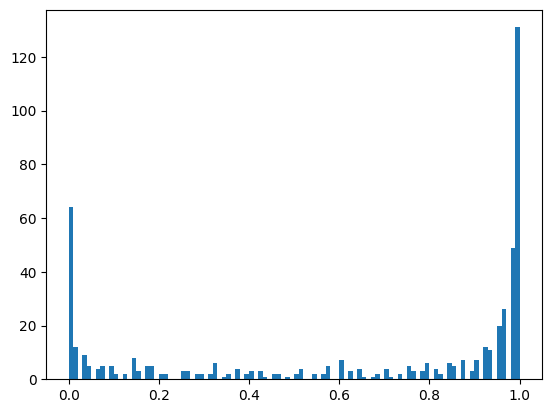

In [19]:
# draw a hist of the stats
import matplotlib.pyplot as plt
plt.hist([i[0]/i[1] for i in stats.values()], bins=100)
plt.show()


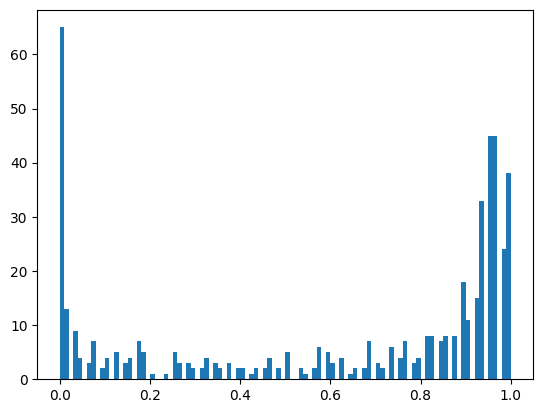

In [13]:
# draw a hist of the stats
import matplotlib.pyplot as plt
plt.hist([i[0]/i[1] for i in stats.values()], bins=100)
plt.show()


In [20]:
# find out the question id with the highest accuracy
max_accuracy = max([i[0]/i[1] for i in stats.values()])
max_question_ids = [k for k, v in stats.items() if v[0]/v[1] == max_accuracy]
# show first 10 questions
for i in range(10):
    print(dataset["problem"][max_question_ids[i]])
    print(answers[max_question_ids[i]])
    print("-"*100)


What is the smallest integral value of $k$ such that
$2x(kx-4)-x^2+6=0$ has no real roots?
2
----------------------------------------------------------------------------------------------------
If $2137^{753}$ is multiplied out, the units' digit in the final product is:
7
----------------------------------------------------------------------------------------------------
If $b>1$, $x>0$, and $(2x)^{\log_b 2}-(3x)^{\log_b 3}=0$, then $x$ is
\frac{1}{6}
----------------------------------------------------------------------------------------------------
What is $\left(20 - \left(2010 - 201\right)\right) + \left(2010 - \left(201 - 20\right)\right)$?
40
----------------------------------------------------------------------------------------------------
A point is chosen at random from within a circular region. What is the probability that the point is closer to the center of the region than it is to the boundary of the region?
\frac{1}{4}
----------------------------------------------------

In [21]:
# average accuracy

print(sum([i[0]/i[1] for i in stats.values()])/len(stats))

0.649261474609375


In [26]:
result_dict

{}

In [30]:
x = 0

# lowest accuracy
min_accuracy = min([i[0]/i[1] for i in stats.values()])
min_question_ids = [k for k, v in stats.items() if v[0]/v[1] == min_accuracy]
print(min_question_ids)
# show first 10 questions
for i in range(len(min_question_ids)):
    # print(dataset["problem"][min_question_ids[i]])
    # print(answers[min_question_ids[i]])
    # show the most frequent model output
    model_outputs = [result_dict[f"{min_question_ids[i]}-{j}"]["model_output"] for j in range(64)]
    most_frequent_model_output = max(set(model_outputs), key=model_outputs.count)
    # print(most_frequent_model_output, model_outputs.count(most_frequent_model_output))
    # print("-"*100)
    count = model_outputs.count(most_frequent_model_output)
    if count > 54:
        print("question: ", dataset["problem"][min_question_ids[i]])
        print("reference answer: ", answers[min_question_ids[i]])
        print("most frequent model output: ", most_frequent_model_output)
        print("count: ", count)
        # other model outputs and count
        other_model_outputs = [i for i in model_outputs if i != most_frequent_model_output]
        print("other model outputs: ", other_model_outputs)
        print("other model outputs count: ", len(other_model_outputs))
        
        print("-"*100)
        x += 1

[519, 523, 524, 527, 534, 535, 559, 562, 575, 581, 590, 598, 622, 644, 646, 666, 667, 690, 693, 702, 703, 704, 705, 710, 722, 736, 740, 743, 744, 763, 764, 770, 823, 834, 835, 842, 843, 845, 854, 859, 860, 865, 875, 892, 895, 897, 899, 901, 911, 913, 914, 916, 918, 927, 937, 941, 948, 958, 966, 973, 1002, 1007, 1016, 1017]
question:  A dress originally priced at $80$ dollars was put on sale for $25\%$ off.  If $10\%$ tax was added to the sale price, then the total selling price (in dollars) of the dress was
reference answer:  54
most frequent model output:  66
count:  64
other model outputs:  []
other model outputs count:  0
----------------------------------------------------------------------------------------------------
question:  If two poles $20''$ and $80''$ high are $100''$ apart, then the height of the intersection of the lines joining the top of each pole to the foot of the opposite pole is:
reference answer:  16''
most frequent model output:  16
count:  62
other model output

question:  A number $m$ is randomly selected from the set $\{11,13,15,17,19\}$, and a number $n$ is randomly selected from $\{1999,2000,2001,\ldots,2018\}$. What is the probability that $m^n$ has a units digit of $1$?
reference answer:  \frac{7}{20}
most frequent model output:  \dfrac{2}{5}
count:  56
other model outputs:  ['\\dfrac{16}{25}', '\\dfrac{21}{50}', '\\dfrac{1}{2}', '\\dfrac{1}{2}', '\\dfrac{9}{20}', '\\dfrac{1}{2}', '\\dfrac{1}{2}', '\\dfrac{1}{2}']
other model outputs count:  8
----------------------------------------------------------------------------------------------------
question:  One of the sides of a triangle is divided into segments of $6$ and $8$ units by the point of tangency of the inscribed circle. If the radius of the circle is $4$, then the length of the shortest side is
reference answer:  12
most frequent model output:  13
count:  62
other model outputs:  ['10', '\\( s - b \\)']
other model outputs count:  2
-----------------------------------------------

In [31]:
x

18

In [32]:
x = 0

# lowest accuracy
min_accuracy = min([i[0]/i[1] for i in stats.values()])
min_question_ids = [k for k, v in stats.items() if v[0]/v[1] < 0.1 and v[0]/v[1] > 0.01]
# show first 10 questions
for i in range(len(min_question_ids)):
    # print(dataset["problem"][min_question_ids[i]])
    # print(answers[min_question_ids[i]])
    # show the most frequent model output
    model_outputs = [result_dict[f"{min_question_ids[i]}-{j}"]["model_output"] for j in range(64)]
    most_frequent_model_output = max(set(model_outputs), key=model_outputs.count)
    # print(most_frequent_model_output, model_outputs.count(most_frequent_model_output))
    # print("-"*100)
    count = model_outputs.count(most_frequent_model_output)
    if count > 32:
        print("question: ", dataset["problem"][min_question_ids[i]])
        print("reference answer: ", answers[min_question_ids[i]])
        print("most frequent model output: ", most_frequent_model_output)
        print("count: ", count)
        # other model outputs and count
        other_model_outputs = [i for i in model_outputs if i != most_frequent_model_output]
        print("other model outputs: ", other_model_outputs)
        print("other model outputs count: ", len(other_model_outputs))
        
        print("-"*100)
        x += 1

question:  There are $10$ horses, named Horse $1$, Horse $2$, . . . , Horse $10$. They get their names from how many minutes it takes them to run one lap around a circular race track: Horse $k$ runs one lap in exactly $k$ minutes. At time $0$ all the horses are together at the starting point on the track. The horses start running in the same direction, and they keep running around the circular track at their constant speeds. The least time $S > 0$, in minutes, at which all $10$ horses will again simultaneously be at the starting point is $S=2520$. Let $T > 0$ be the least time, in minutes, such that at least $5$ of the horses are again at the starting point. What is the sum of the digits of $T?$
reference answer:  6
most frequent model output:  3
count:  54
other model outputs:  ['6', 'Not possible.\n\nAlternatively, 2,3,4,6, and  something else.\n\nWait, 2,3,4,6, and  something else', 'again at the starting point."\n\nSo, it\'s 12', "already a factor of 6 and 9, but 3 isn't in the set

In [33]:
x

8

In [37]:
print(dataset['solution'][519])

1. **Identify the prime factorization of 100,000**: 
   The prime factorization of $100,000$ is $100,000 = 10^5 = (2 \cdot 5)^5 = 2^5 \cdot 5^5$.

2. **Determine the set $S$ of divisors**:
   The set $S$ consists of all divisors of $100,000$, which can be expressed in the form $2^a5^b$ where $0 \leq a, b \leq 5$.

3. **Consider the product of two distinct elements of $S$**:
   Let's consider two distinct elements $2^a5^b$ and $2^c5^d$ from $S$. Their product is $2^{a+c}5^{b+d}$. We need to ensure $(a, b) \neq (c, d)$.

4. **Range of exponents in the product**:
   Since $0 \leq a, c \leq 5$ and $0 \leq b, d \leq 5$, the sums $a+c$ and $b+d$ can range from $0$ to $10$. Thus, the product can be any divisor of $2^{10}5^{10}$.

5. **Counting divisors of $2^{10}5^{10}$**:
   The number $2^{10}5^{10}$ has $(10+1)(10+1) = 121$ divisors, as each exponent can independently range from $0$ to $10$.

6. **Exclude non-distinct products**:
   We need to exclude products that cannot be formed by the m